### K-nearest neighbors clustering

In [63]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors as knn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull
import geopandas as geo
from geopandas import GeoSeries
from geopandas.tools import geocode
from shapely.geometry import Point, Polygon

%matplotlib inline

def load_data(file_path, sr_type):
    file=pd.read_csv(file_path)
    file["Location"]=file[['Longitude', 'Latitude']].apply(tuple, axis=1)
    no_null=file.dropna(subset=["Latitude"], axis=0)
    df=no_null.loc[no_null["SR Type"].str.contains(sr_type)]
    #today=datetime.datetime.now()
    #df["Days Overdue"]=abs((df["Created Date"]-today).dt.days).astype(int)
    return df

df=load_data(r"C:\Users\sara.brumfield\Documents\DPW Model\Backlog\bulkreport.csv", "Bulk")
df

,Service Request Number,Service Request Id,SR Type,Address,Created Date,Schedule: Schedule Date,Expected Finish Date/Time,SR Status,BlockLot,Latitude,Longitude,Open,Location
0,20-00129323,20-00129323,SW-Bulk Scheduled,"10 GITTINGS AVE, Baltimore City, 21212",3/4/2020 12:18,3/25/2020,3/25/2020 23:59,Open,4973 002A,39.371436,-76.622125,1,"(-76.62212517, 39.37143576)"
1,20-00116113,20-00116113,SW-Bulk Scheduled,"210 CEDARCROFT RD, Baltimore City, 21212",2/27/2020 7:34,3/25/2020,3/25/2020 23:59,Open,5080 009,39.369389,-76.616571,1,"(-76.61657118, 39.36938891)"
2,20-00129485,20-00129485,SW-Bulk Scheduled,"110 CASTLEWOOD RD, Baltimore City, 21210",3/4/2020 13:28,3/25/2020,3/25/2020 23:59,Open,4843K006,39.366627,-76.630008,1,"(-76.63000809999998, 39.36662668)"
3,20-00129563,20-00129563,SW-Bulk Scheduled,"4804 NURTON AVE, Baltimore City, 21215",3/4/2020 14:07,3/25/2020,3/25/2020 23:59,Open,4801 035,39.347237,-76.661233,1,"(-76.66123281, 39.34723652)"
4,20-00129616,20-00129616,SW-Bulk Scheduled,"3003 ROSALIND AVE, Baltimore City, 21215",3/4/2020 14:23,3/25/2020,3/25/2020 23:59,Open,4804A029,39.345650,-76.665878,1,"(-76.66587779, 39.34565)"
5,20-00129968,20-00129968,SW-Bulk Scheduled,"5700 VISITATION WAY, Baltimore City, 21210",3/4/2020 15:49,3/25/2020,3/25/2020 23:59,Open,4820F063,39.367204,-76.636922,1,"(-76.63692178, 39.367204)"
6,20-00129957,20-00129957,SW-Bulk Scheduled,"2422 SHIRLEY AVE, Baltimore City, 21215",3/4/2020 15:45,3/25/2020,3/25/2020 23:59,New,3347A011,39.336372,-76.657600,1,"(-76.65759986, 39.33637225)"
7,20-00130575,20-00130575,SW-Bulk Scheduled,"3630 MALDEN AVE, Baltimore City, 21211",3/5/2020 6:02,3/25/2020,3/25/2020 23:59,New,3389 005,39.332381,-76.651171,1,"(-76.65117115, 39.332381299999994)"
8,20-00131667,20-00131667,SW-Bulk Scheduled,"6031 BELLONA AVE, Baltimore City, 21212",3/5/2020 11:21,3/25/2020,3/25/2020 23:59,New,5089 010,39.366445,-76.616850,1,"(-76.61685011, 39.36644529)"
9,20-00131666,20-00131666,SW-Bulk Scheduled,"3445 REISTERSTOWN RD, Baltimore City, 21215",3/5/2020 11:21,3/25/2020,3/25/2020 23:59,Open,3326 034,39.327704,-76.658986,1,"(-76.6589858, 39.32770362)"


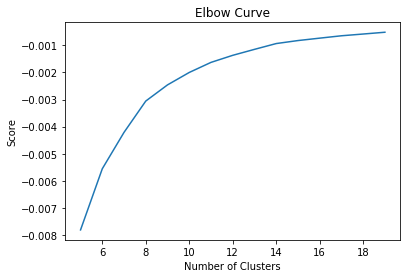

In [64]:
def fit_data(df, n1, n2):
    x=df.loc[:,['Service Request Number','Latitude','Longitude']]
    K_clusters = range(n1,n2)
    kmeans = [KMeans(n_clusters=i) for i in K_clusters]
    Y_axis = df[['Latitude']]
    X_axis = df[['Longitude']]
    score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
    plt.plot(K_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()
    return x

y=fit_data(df, 5,20)

In [84]:
def make_clusters(df, n_clusters, first_col_index, last_col_index):
    kmeans = KMeans(n_clusters=n_clusters, init ='k-means++')
    kmeans.fit(df[df.columns[first_col_index:last_col_index]]) # Compute k-means clustering.x
    df['cluster_label'] = kmeans.fit_predict(df[df.columns[first_col_index:last_col_index]])
    centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
    labels = kmeans.predict(df[df.columns[first_col_index:last_col_index]]) # Labels of each point
    return centers, labels

centers, labels=make_clusters(y, 5, 1, 3)

In [85]:
def save_clusters(df, y):
    clustered_data = df.merge(y, left_on='Service Request Number', right_on='Service Request Number')
    clustered_data.to_excel(r"C:\Users\sara.brumfield\Documents\DPW Model\Backlog\Bulk Cluster List.xlsx")
    return clustered_data.sort_values(by="cluster_label")

z=save_clusters(df, y)

In [88]:
def geocode(z):
    z=z.rename(columns={"BlockLot":"BLOCKLOT"})
    parcel_map=geo.read_file(r'C:\Users\sara.brumfield\Documents\GIT\Parcels\parcel.shp')
    geo_parcel=geo.GeoDataFrame(parcel_map, geometry='geometry')
    df_parcel=geo_parcel.merge(z, how='right', on=['BLOCKLOT'])
    return df_parcel

df_parcel=geocode(z)

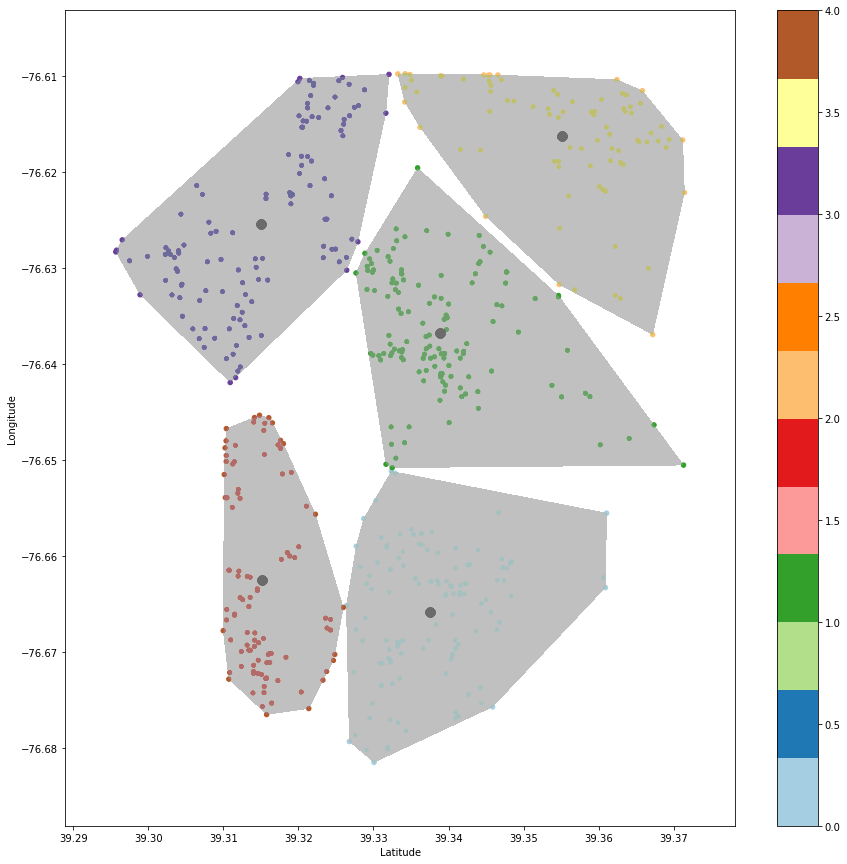

In [87]:
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
    
def viz_clusters(y, labels, centers):
    fig, ax = plt.subplots(figsize=(15,15))
    #basemap=parcel_map.plot(ax=ax, alpha=.5, color='grey')
    #df_parcel.plot(ax=basemap, color='red')
    y.plot.scatter(x='Latitude', y='Longitude', c=labels, cmap='Paired', ax=ax) #s=df['Days Overdue']*3, 
    ax=plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.75)

    for i in y["cluster_label"]:
        j=y.loc[y["cluster_label"]==i]
        encircle(j["Latitude"], j["Longitude"], fc='silver', alpha=0.01)
        
viz_clusters(y, labels, centers)

### DBScan Sandbox

In [ ]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

coords=test[['Longitude', 'Latitude']] #.apply(tuple, axis=1)
db = DBSCAN(eps=.5/6371., min_samples=15, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

centermost_points = clusters.map(get_centermost_point)
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rs = rep_points.apply(lambda row: df[(df['lat']==row['lat']) & (df['lon']==row['lon'])].iloc[0], axis=1)

fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['lon'], df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()